In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import glob
plt.style.use('ggplot')


In [3]:
data = {}
for filepath in glob.glob(f"erc20/*.bin"):
    filename = os.path.basename(filepath)
    with open(filepath, 'rb') as f:
        content = f.read()
        data[filename] = len(content)
data

{'solady-ERC20.bin': 4206,
 'vyper_ERC20Permit.bin': 4239,
 'solmate-ERC20.bin': 6939,
 'maple-ERC20.bin': 7019}

In [5]:
labels = ["Solady", "Vyper", "Solmate", "Maple"]
data = {labels[i]: v for i, v in enumerate(data.values())}
data

{'Solady': 4206, 'Vyper': 4239, 'Solmate': 6939, 'Maple': 7019}

In [22]:
print(4239/6939 * 100)
print(4239/((4206+6939+7019)/3) * 100)

61.08949416342413
70.01211186963224


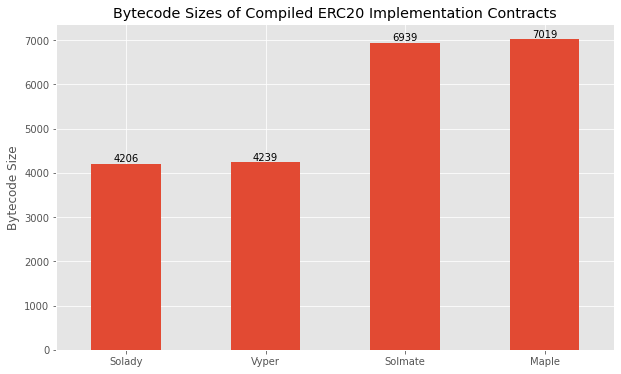

In [16]:
df = pd.DataFrame(list(data.items()), columns=['File', 'Size'])
ax = df.plot(kind='bar', x='File', y='Size', legend=None, figsize=(10,6))
ax.set_ylabel('Bytecode Size')
ax.set_xlabel('')
ax.set_title('Bytecode Sizes of Compiled ERC20 Implementation Contracts')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.savefig('charts/erc20_bytecode_sizes.png', bbox_inches='tight', facecolor='white')

In [17]:
data = {}
for filepath in glob.glob(f"erc4626/*.bin"):
    filename = os.path.basename(filepath)
    with open(filepath, 'rb') as f:
        content = f.read()
        data[filename] = len(content)
data

{'SolidityVault.bin': 10506,
 'VyperVault.bin': 7843,
 'solmate-ERC4626.bin': 14311,
 'solady-ERC4626.bin': 10327}

In [18]:
labels = ["Fubu/OZ", "Vyper", "Solmate", "Solady"]
data = {labels[i]: v for i, v in enumerate(data.values())}
data

{'Fubu/OZ': 10506, 'Vyper': 7843, 'Solmate': 14311, 'Solady': 10327}

In [24]:
print(7843/10327 * 100)
print(7843/((10506+14311+10327)/3) * 100)

75.94654788418708
66.95026178010471


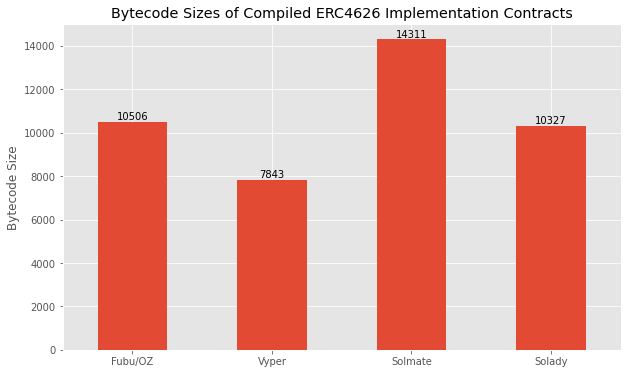

In [19]:
df = pd.DataFrame(list(data.items()), columns=['File', 'Size'])
ax = df.plot(kind='bar', x='File', y='Size', legend=None, figsize=(10,6))
ax.set_ylabel('Bytecode Size')
ax.set_xlabel('')
ax.set_title('Bytecode Sizes of Compiled ERC4626 Implementation Contracts')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.savefig('charts/erc4626_bytecode_sizes.png', bbox_inches='tight', facecolor='white')

In [26]:
repositories = ['hello_world', 'auction', 'struct', 'increments', 'loops', 'stocks']

In [53]:
df = pd.DataFrame(columns=['Repository', 'Vyper Size', 'Solidity Size'])

data = []

for repo in repositories:
    vyper_file = glob.glob(os.path.join(repo, 'vyper_*.bin'))[0]
    solidity_file = glob.glob(os.path.join(repo, 'Solidity*.bin'))[0]
    
    with open(vyper_file, 'rb') as file:
        vyper_size = len(file.read())
    with open(solidity_file, 'rb') as file:
        solidity_size = len(file.read())
    
    data.append((repo, vyper_size, solidity_size))

df = pd.DataFrame(data, columns=['Repository', 'Vyper Size', 'Solidity Size'])

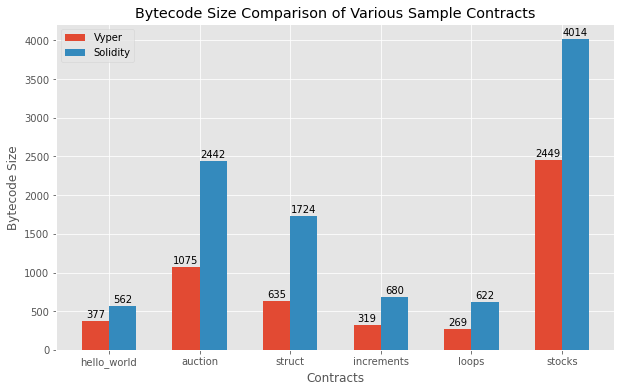

In [56]:
import numpy as np

barWidth = 0.3
r1 = np.arange(len(df['Repository']))
r2 = [x + barWidth for x in r1]

fig, ax = plt.subplots(figsize=(10,6))

bars1 = ax.bar(r1, df['Vyper Size'], width = barWidth, label ='Vyper')
bars2 = ax.bar(r2, df['Solidity Size'], width = barWidth, label ='Solidity')

ax.set_xlabel('Contracts')
ax.set_ylabel('Bytecode Size')
ax.set_title('Bytecode Size Comparison of Various Sample Contracts')
ax.set_xticks([r + barWidth/2 for r in range(len(df['Vyper Size']))])  # Adjust the x-ticks position here
ax.set_xticklabels(df['Repository'])

for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 150, int(yval), va='bottom' if yval < 0 else 'top', ha='center')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, yval + 150, int(yval), va='bottom' if yval < 0 else 'top', ha='center')

ax.legend()
plt.savefig('charts/standard_contracts_comparison.png', bbox_inches='tight', facecolor='white')

In [60]:
df["Reduction"] = (1 - df['Vyper Size'] / df['Solidity Size']) * 100
df

,Repository,Vyper Size,Solidity Size,Reduction
0,hello_world,377,562,32.918149
1,auction,1075,2442,55.978706
2,struct,635,1724,63.167053
3,increments,319,680,53.088235
4,loops,269,622,56.752412
5,stocks,2449,4014,38.988540


In [58]:
df.describe()

,Vyper Size,Solidity Size,Reduction
count,6.000000,6.000000,6.000000
mean,854.000000,1674.000000,50.148849
std,836.278183,1371.073156,11.637503
min,269.000000,562.000000,32.918149
25%,333.500000,636.500000,42.513464
50%,506.000000,1202.000000,54.533471
75%,965.000000,2262.500000,56.558985
max,2449.000000,4014.000000,63.167053
